In [63]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from os.path import join
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [52]:
def prep_data():

    # load data from preprocess pipeline
    dataset = np.load(join('../data/d_dataset_p1/prep_data_13','training_subsets.npz'))
    train_pho =dataset['z_train']
    train_param= dataset['y_train']
    val_pho = dataset['z_val']
    val_param = dataset['y_val']
    test_pho = dataset['z_test']
    test_param = dataset['y_test']

    print('Train features and labels %s %s'%(str(X_train.shape),str(y_train.shape)))
    print('Validating features and labels %s %s'%(str(X_val.shape),str(y_val.shape)))
    print('Test features and labels %s %s'%(str(X_test.shape),str(y_test.shape)))

    return train_pho, val_pho, test_pho, train_param, val_param, test_param

In [53]:
X_train, X_val, X_test, y_train, y_val, y_test = prep_data()

Train features and labels (98746,) (98746, 24)
Validating features and labels (80614,) (80614, 24)
Test features and labels (12092,) (12092, 24)


In [54]:
print(set(X_train))

{'Q', 'A', 'E:', 'i', '2', 'U', 'o', '7', '&', 'O', 'y', 'a', 'e', 'E', 'u', 'M', '@', 'V', '9'}


## Scale D 

In [55]:
#y_train = StandardScaler().fit_transform(y_train)

## PCA 

In [56]:
pca = PCA(n_components=3)
pca.fit(y_train)
y_train_pca = pca.transform(y_train)

In [57]:
y_train_pca[:,1].shape

(98746,)

In [58]:
X_train.shape

(98746,)

In [59]:
dataset = pd.DataFrame({'phonetic': X_train, 'PCA1': y_train_pca[:,0], 'PCA2': y_train_pca[:,1],'PCA3': y_train_pca[:,2]})

In [60]:
dataset.head()

,phonetic,PCA1,PCA2,PCA3
0,i,2.928661,-0.536874,0.891613
1,O,-1.439072,1.226302,1.467374
2,y,2.134812,0.198928,0.039145
3,y,2.345602,-0.019816,-0.214774
4,a,-1.851945,-0.753656,-0.267262


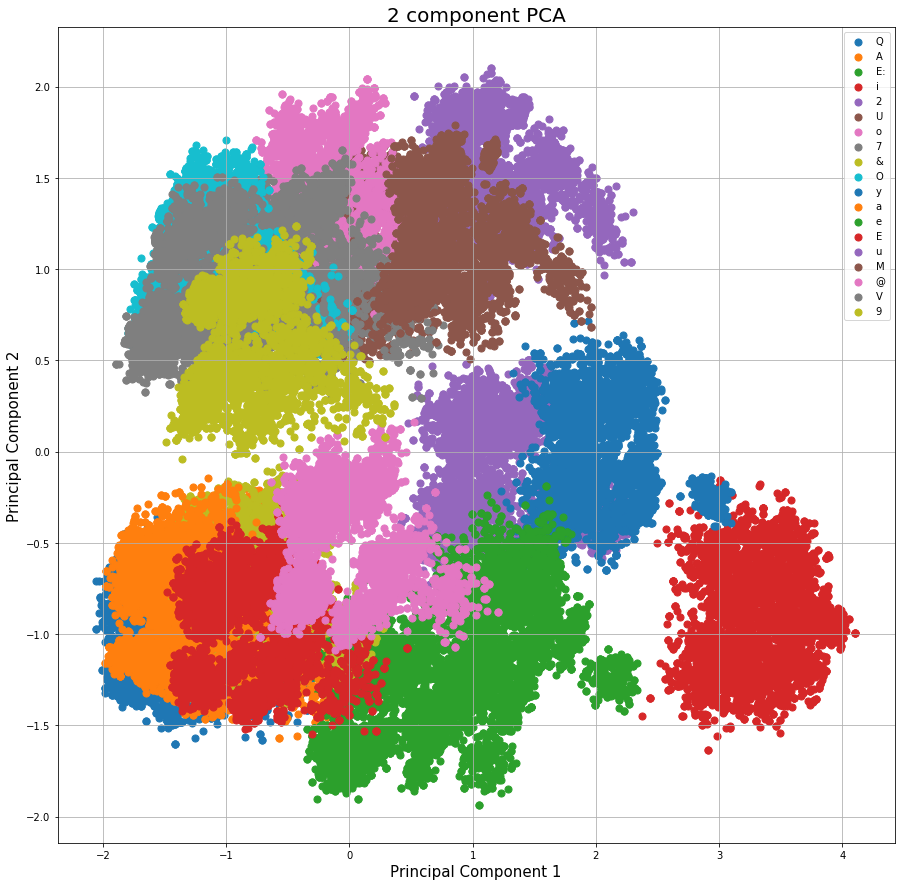

In [61]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = list(set(X_train))
for target in targets:
    indicesToKeep = dataset['phonetic'] == target
    ax.scatter(dataset.loc[indicesToKeep, 'PCA1']
               , dataset.loc[indicesToKeep, 'PCA2']
               , s = 50)
ax.legend(targets)
ax.grid()

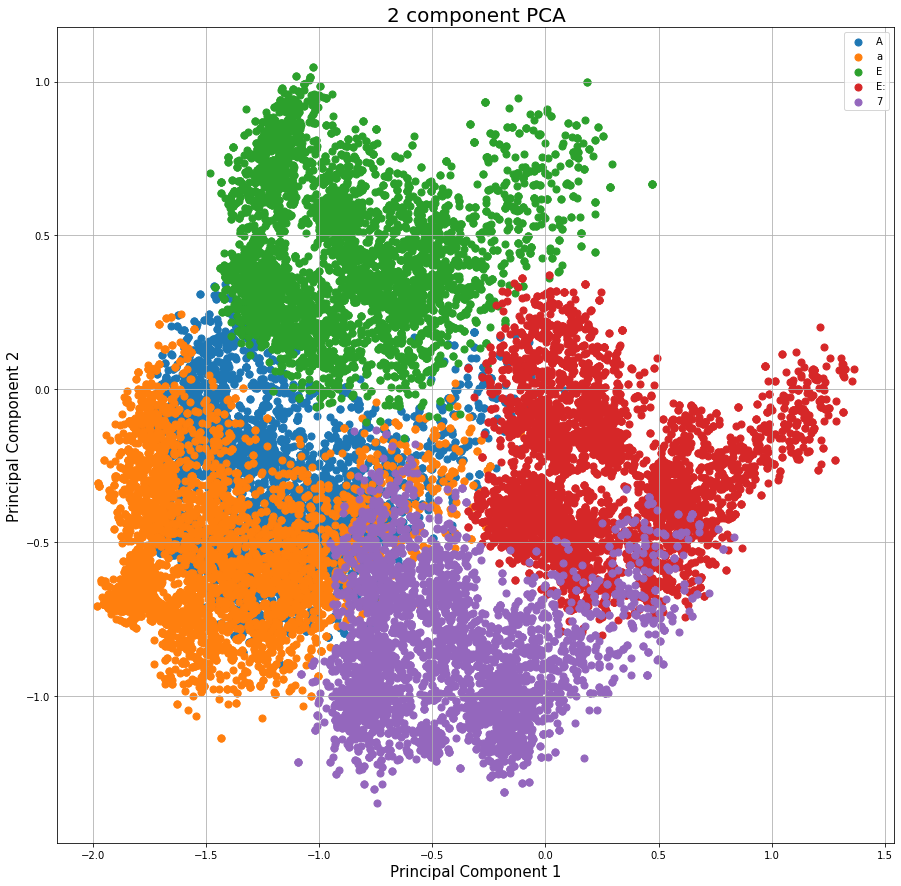

In [62]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [ 'A', 'a', 'E', 'E:','7']
for target in targets:
    indicesToKeep = dataset['phonetic'] == target
    ax.scatter(dataset.loc[indicesToKeep, 'PCA1']
               , dataset.loc[indicesToKeep, 'PCA3']
               , s = 50)
ax.legend(targets)
ax.grid()

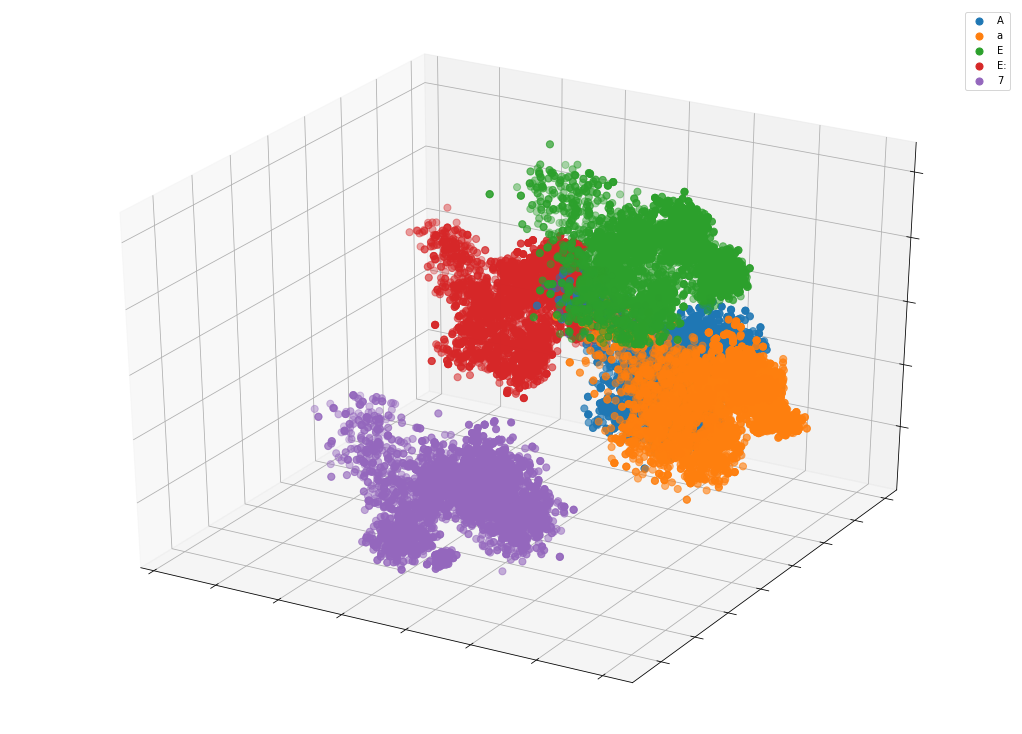

In [77]:
fig = plt.figure(figsize=(20, 10))
ax = Axes3D(fig, rect=[0, 0, .7, 1], elev=30, azim=120)


targets = [ 'A', 'a', 'E', 'E:','7']
# targets = list(set(X_train))
for target in targets:
    indicesToKeep = dataset['phonetic'] == target
    ax.scatter(dataset.loc[indicesToKeep, 'PCA1']
               , dataset.loc[indicesToKeep, 'PCA2']
               , dataset.loc[indicesToKeep, 'PCA3']
               , s = 50)
ax.legend(targets)
ax.grid()

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()